# Task
Perform an in-depth Exploratory Data Analysis (EDA) on the Titanic dataset loaded from `seaborn.load_dataset('titanic')`. The EDA should include analyzing data distributions, identifying missing values, detecting outliers, and uncovering relationships between variables. Utilize visualizations such as histograms, box plots, and heatmaps to support your findings. The analysis should be guided by the provided dataset metadata and project overview.

## Load the dataset

### Subtask:
Load the Titanic dataset into a pandas DataFrame.


**Reasoning**:
Import necessary libraries and load the titanic dataset into a pandas DataFrame.



In [1]:
import pandas as pd
from seaborn import load_dataset

df = load_dataset('titanic')
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Initial data inspection

### Subtask:
Display the first few rows, check data types, and look for missing values.


**Reasoning**:
Display the first few rows, check data types, and look for missing values in the DataFrame.



In [2]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Univariate analysis

### Subtask:
Analyze the distribution of individual variables using histograms and box plots.


**Reasoning**:
Identify numerical and categorical columns and generate visualizations for their distributions.



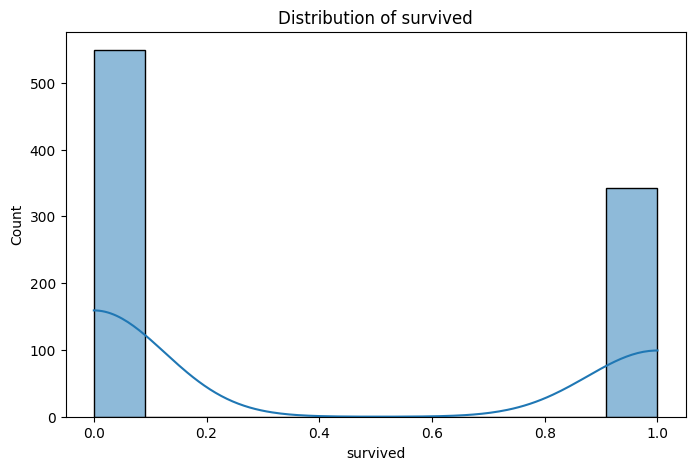

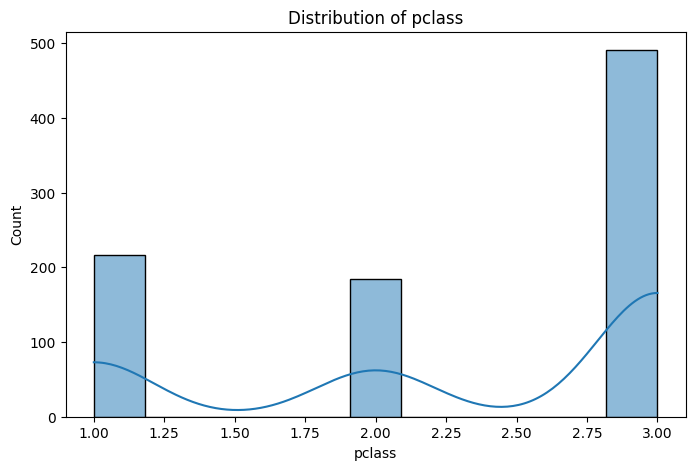

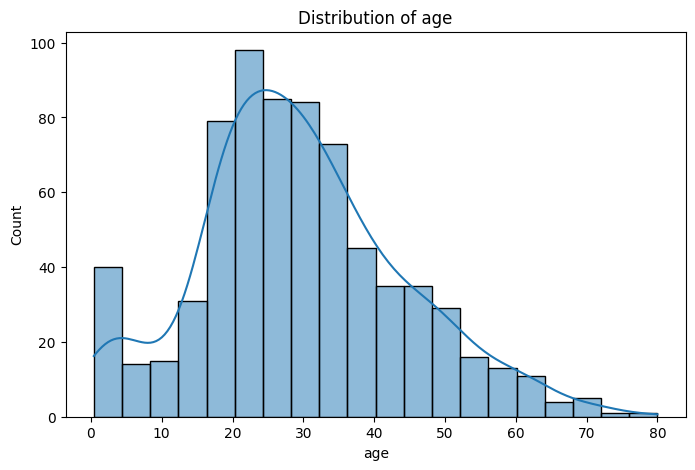

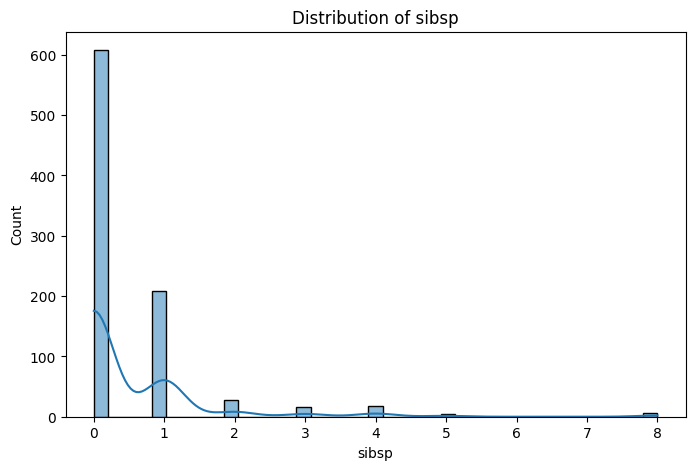

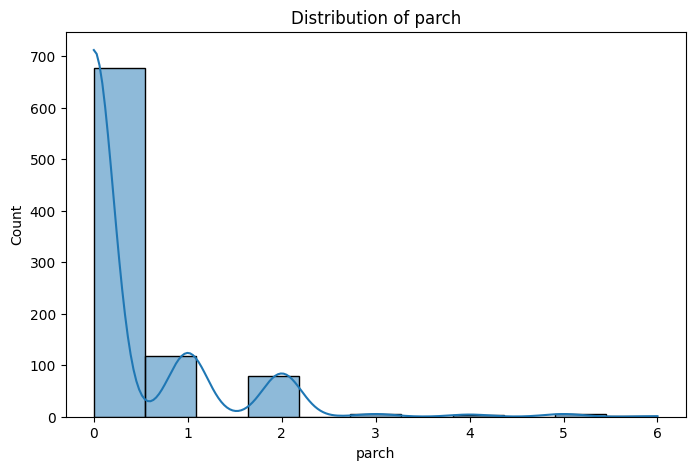

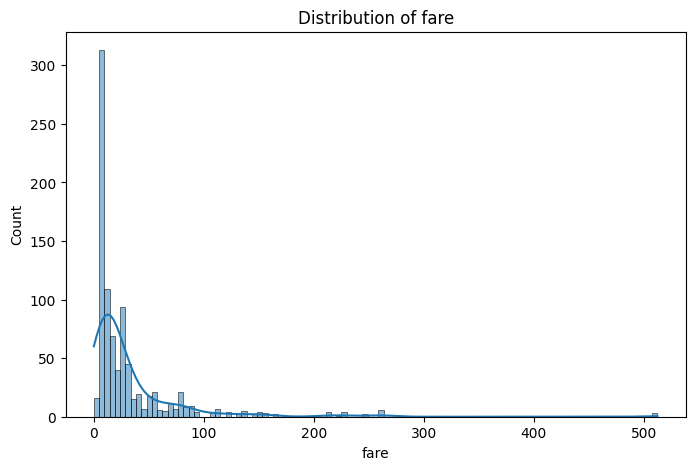

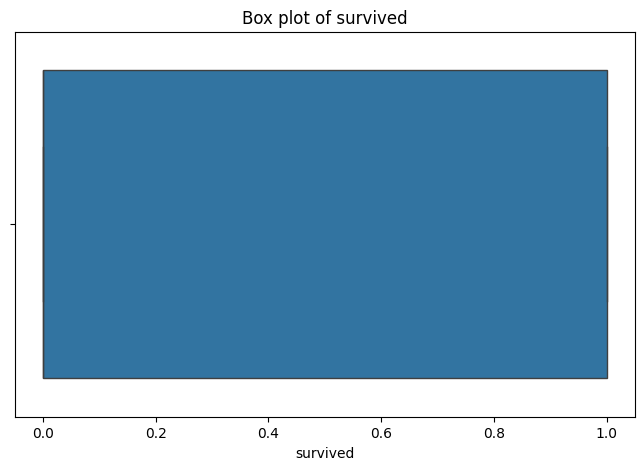

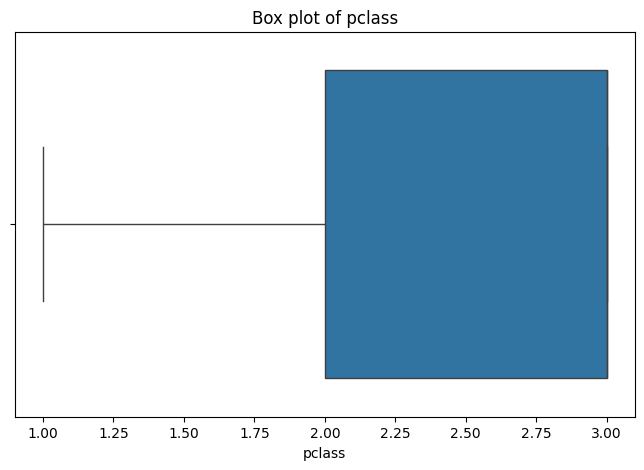

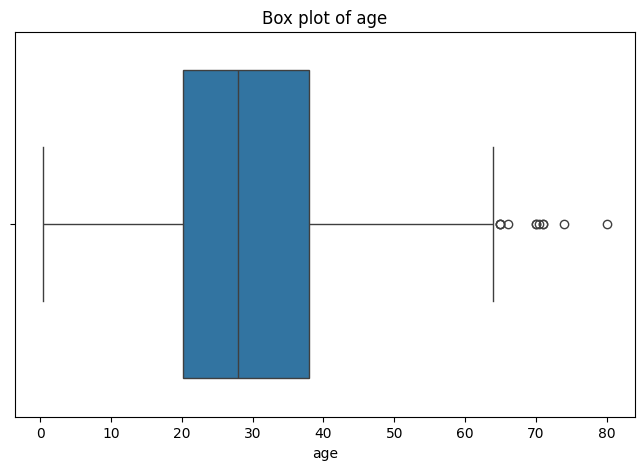

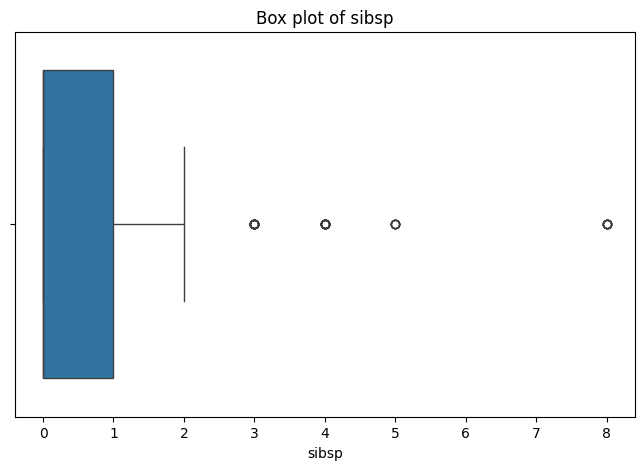

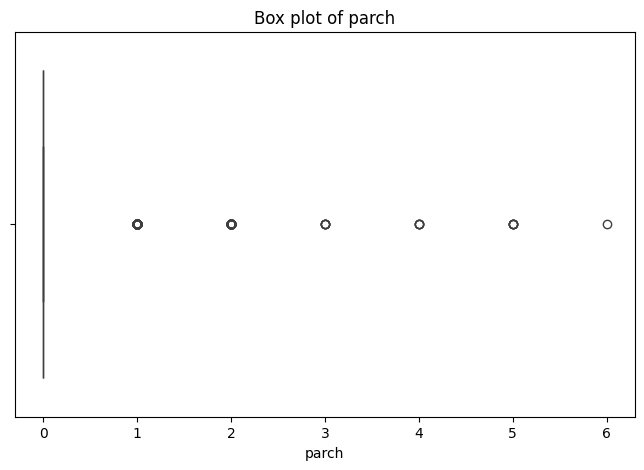

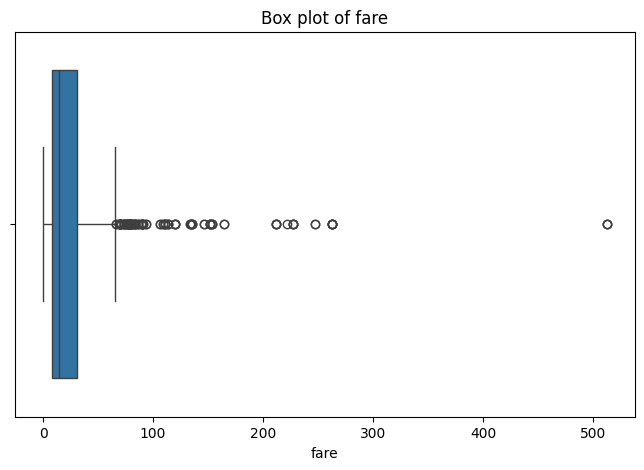

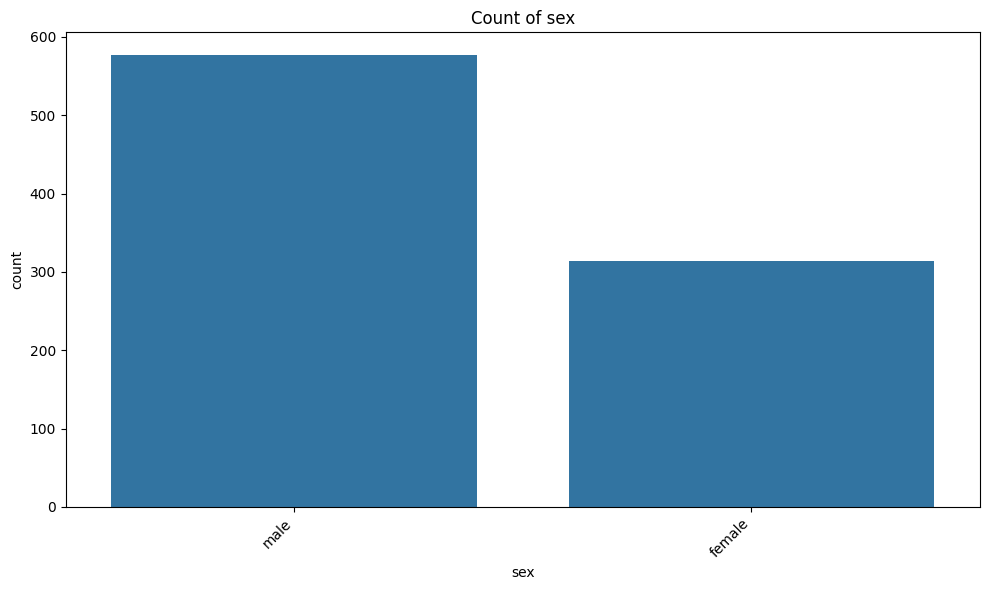

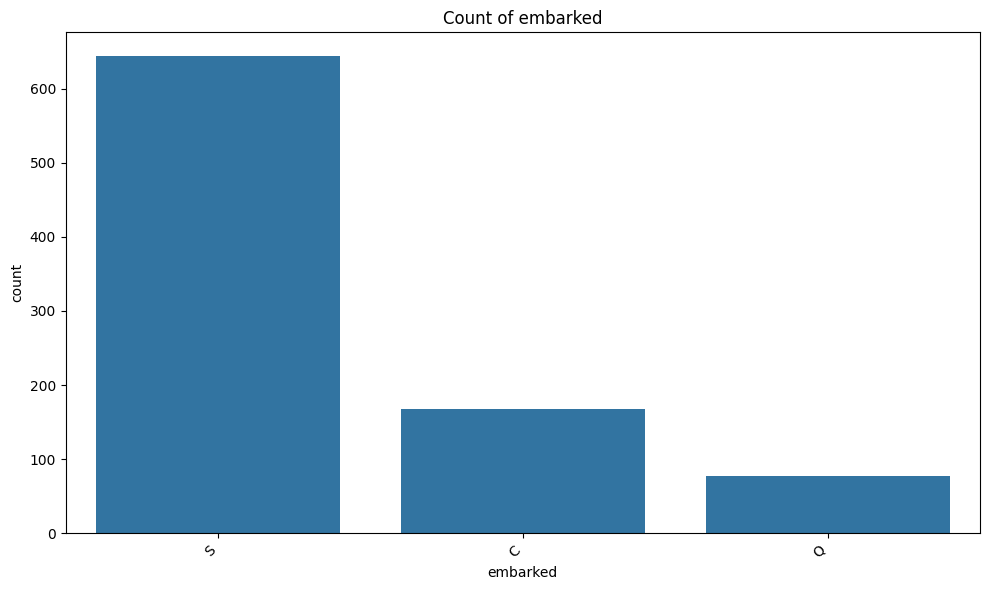

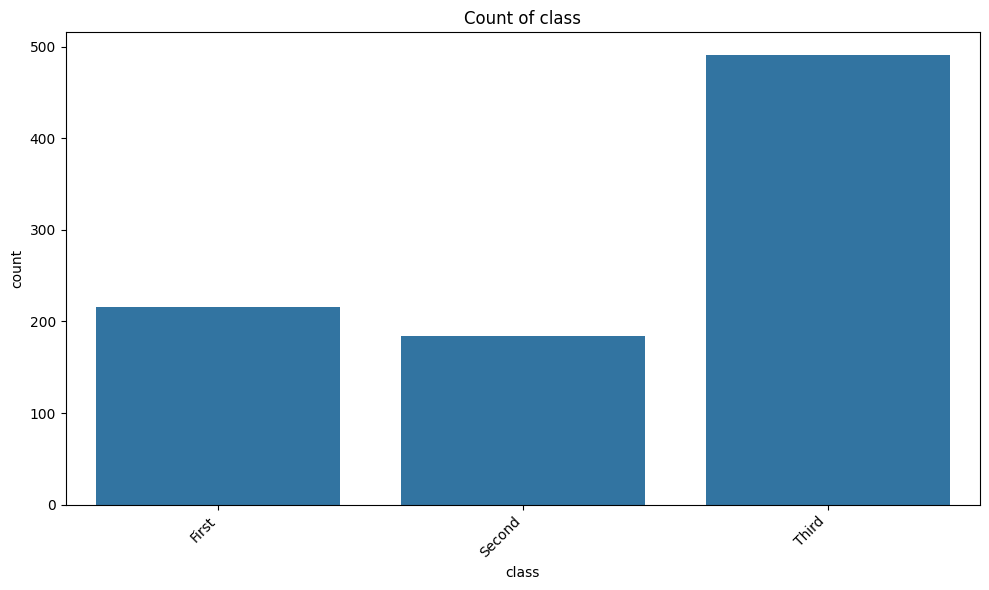

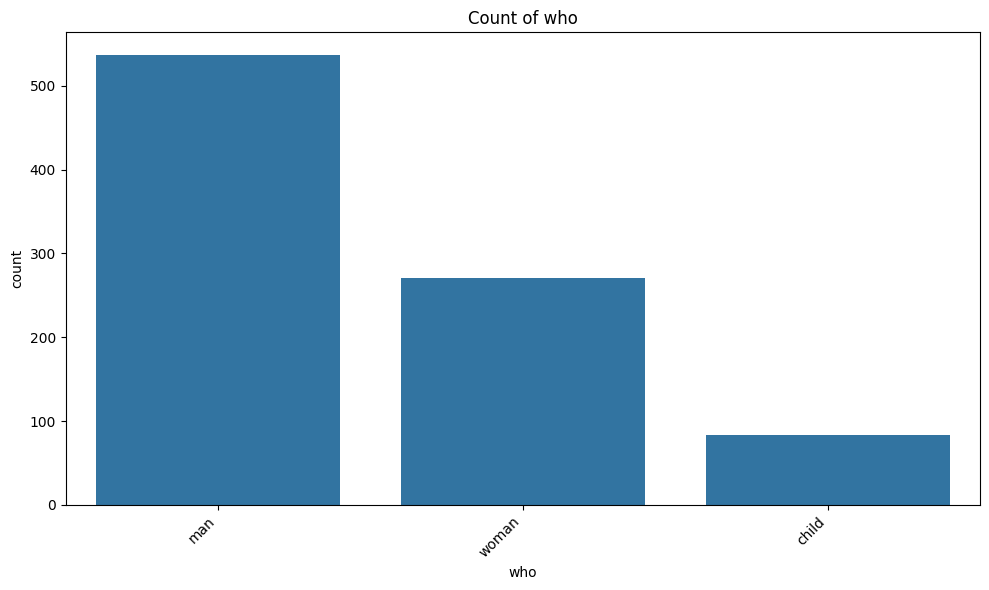

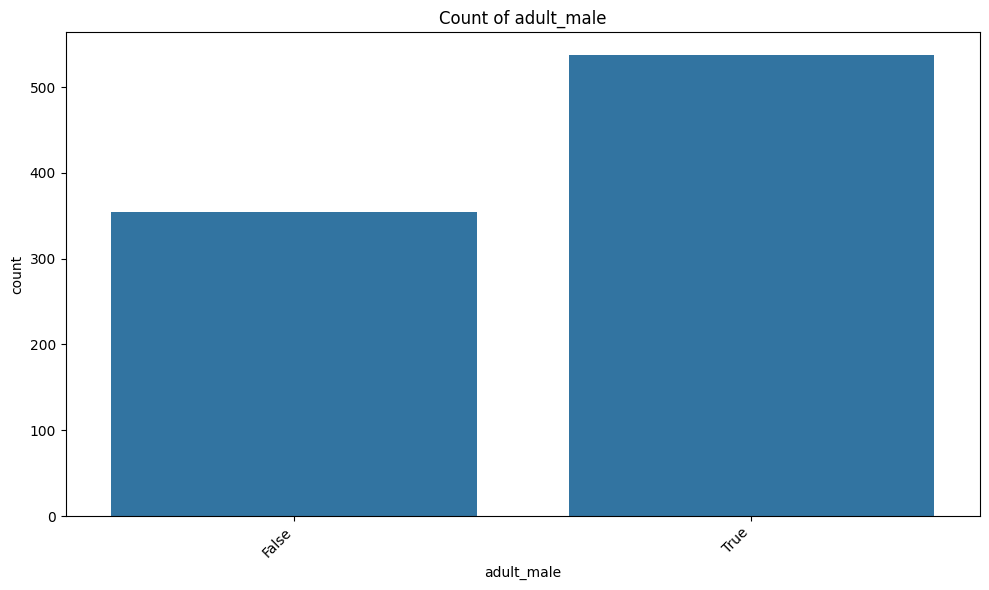

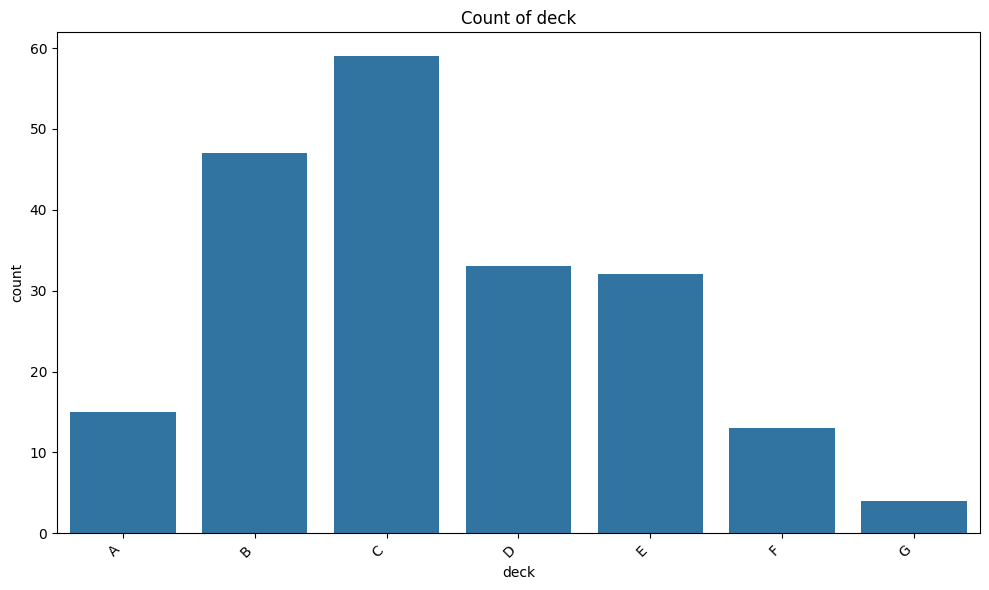

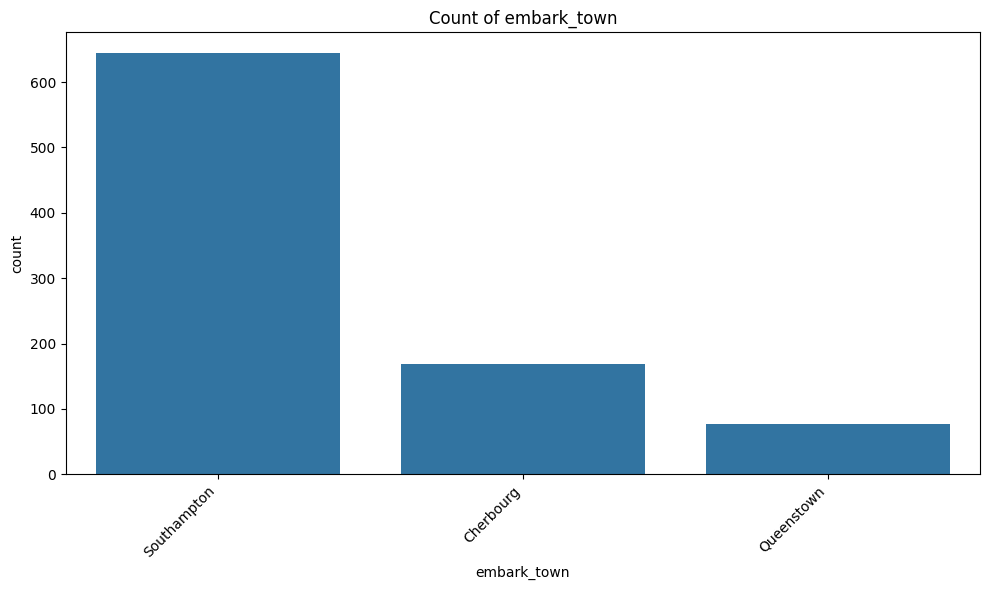

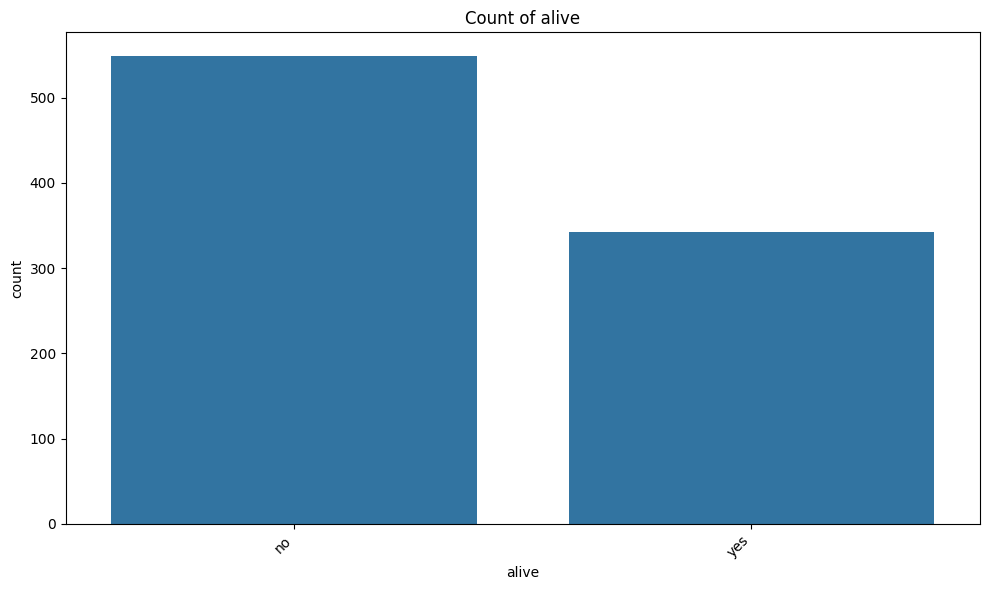

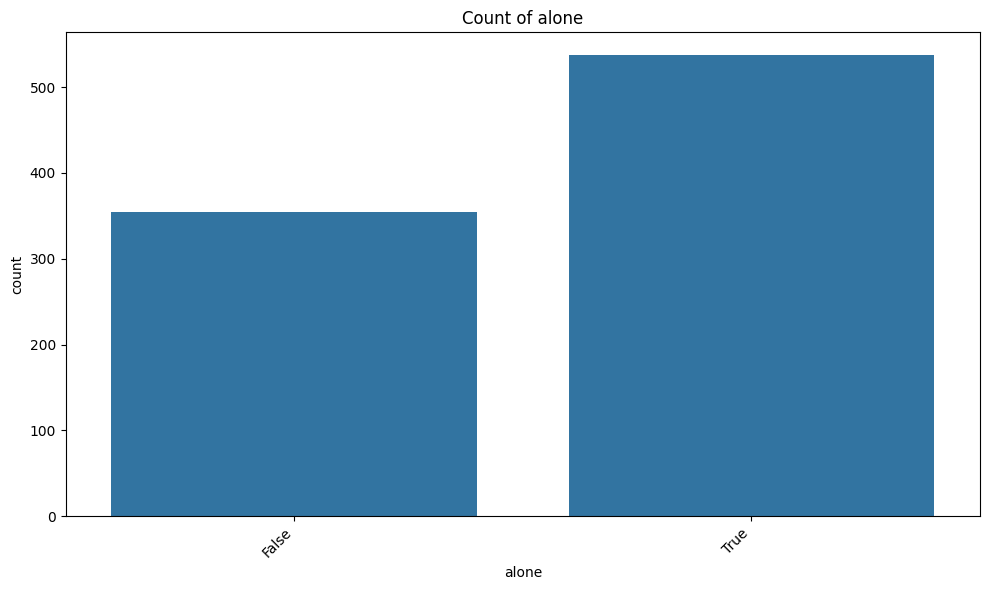

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()

# Plot count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Bivariate analysis

### Subtask:
Explore relationships between pairs of variables using scatter plots, heatmaps, or other appropriate visualizations.


**Reasoning**:
Generate a heatmap to visualize the correlation matrix of the numerical columns in the DataFrame df.



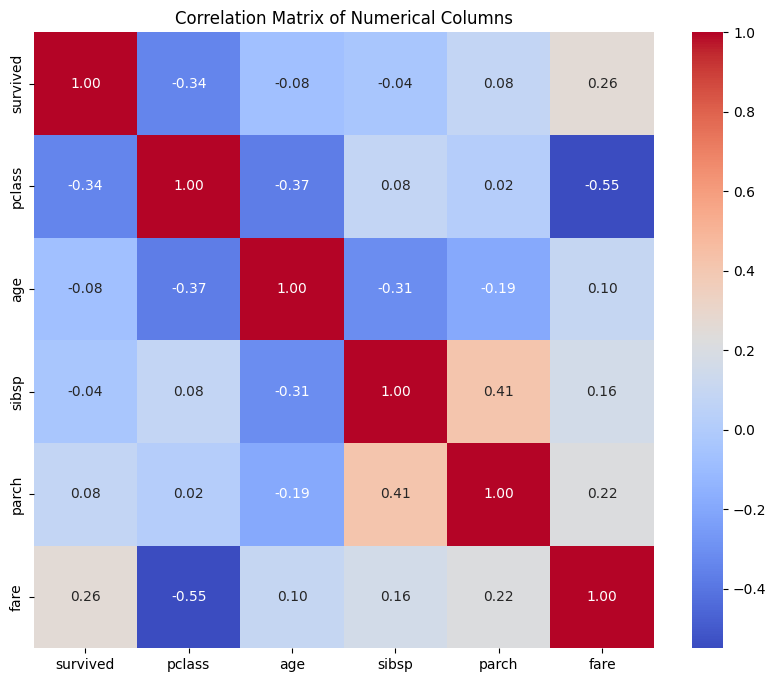

In [4]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Reasoning**:
Create scatter plots to explore relationships between key numerical variables, such as 'age' and 'fare', 'age' and 'pclass', and 'fare' and 'pclass'. Consider using hue to differentiate by 'survived' status.



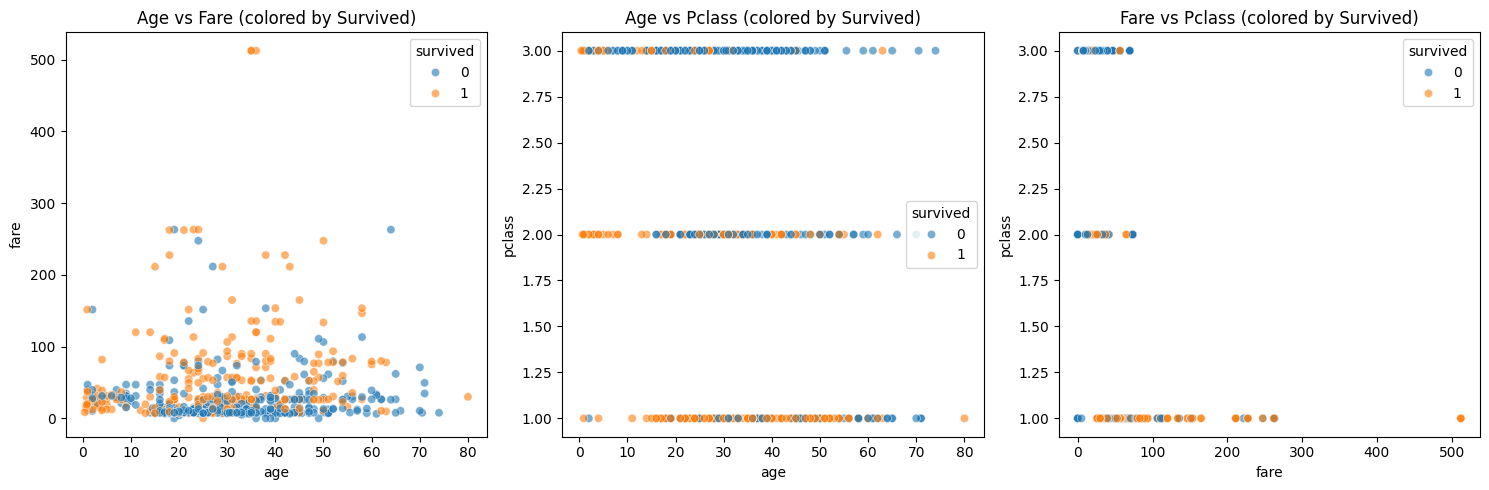

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='age', y='fare', hue='survived', alpha=0.6)
plt.title('Age vs Fare (colored by Survived)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='age', y='pclass', hue='survived', alpha=0.6)
plt.title('Age vs Pclass (colored by Survived)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='fare', y='pclass', hue='survived', alpha=0.6)
plt.title('Fare vs Pclass (colored by Survived)')

plt.tight_layout()
plt.show()

**Reasoning**:
Generate visualizations to examine the relationship between categorical variables and numerical variables, such as 'pclass' and 'fare', 'sex' and 'age', and 'embarked' and 'fare'.



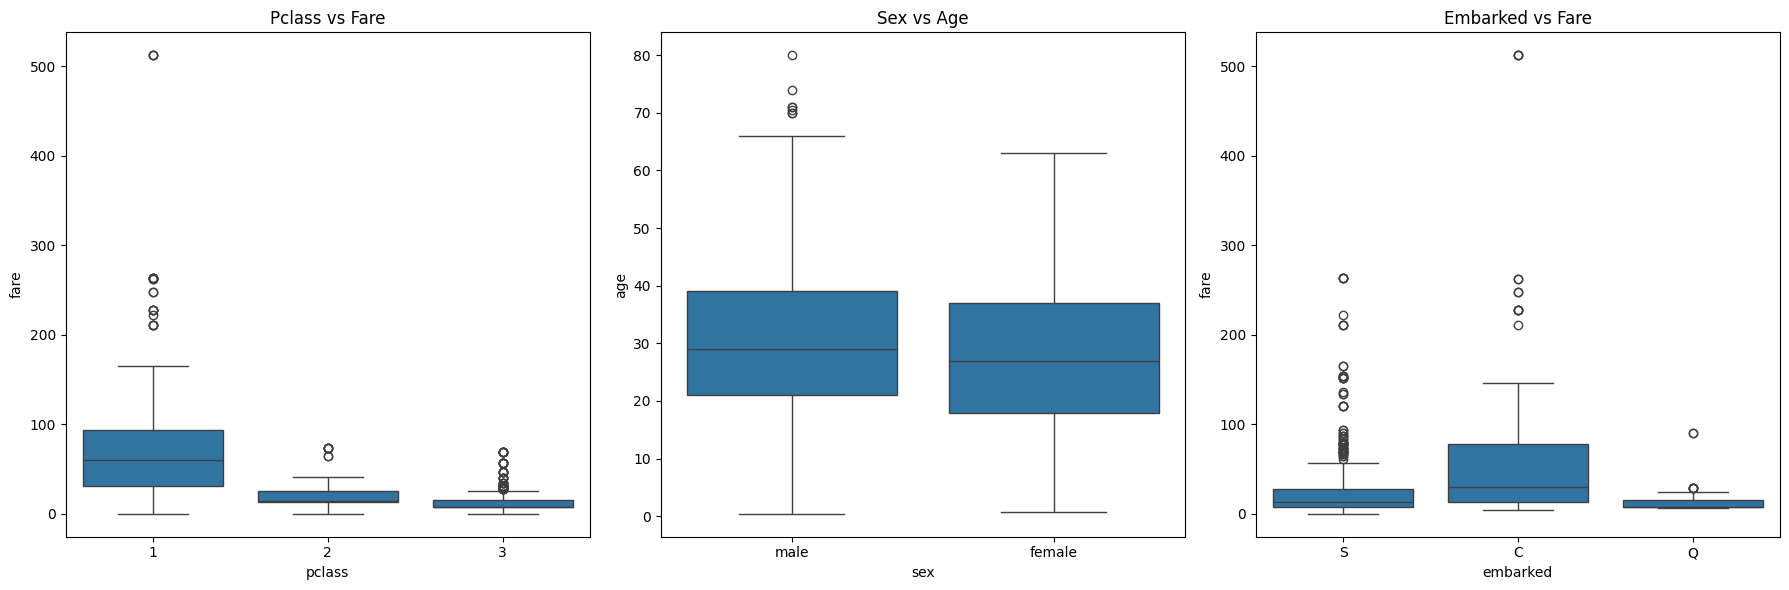

In [6]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='pclass', y='fare')
plt.title('Pclass vs Fare')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='sex', y='age')
plt.title('Sex vs Age')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='embarked', y='fare')
plt.title('Embarked vs Fare')

plt.tight_layout()
plt.show()

**Reasoning**:
Create visualizations to explore relationships between pairs of categorical variables, such as 'pclass' and 'survived', 'sex' and 'survived', and 'embarked' and 'survived'.



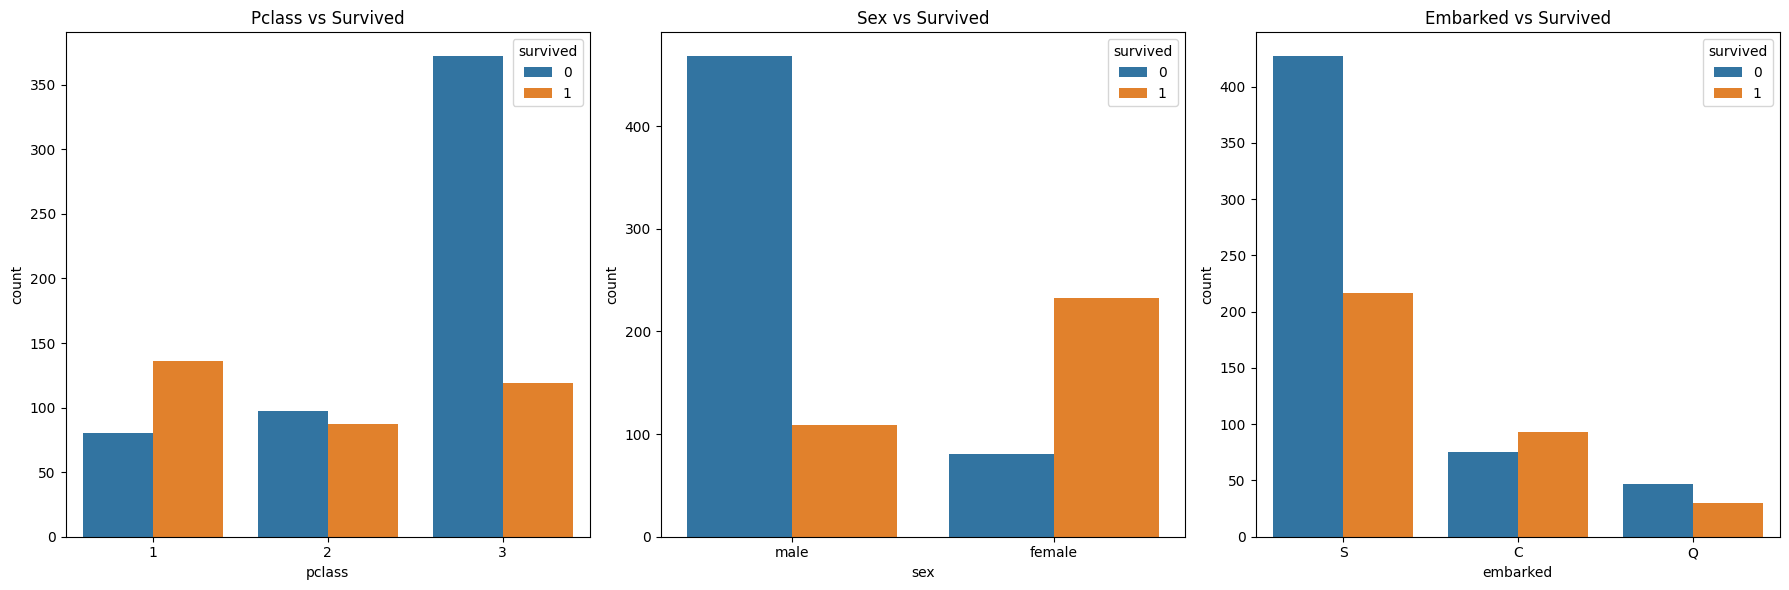

In [7]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Pclass vs Survived')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Sex vs Survived')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='embarked', hue='survived')
plt.title('Embarked vs Survived')

plt.tight_layout()
plt.show()

## Handle missing values and outliers

### Subtask:
Address missing data and outliers based on the insights from the analysis.


**Reasoning**:
Address missing values in 'age', 'embarked', and 'embark_town' by imputation, drop the 'deck' column due to excessive missing data, and cap outliers in 'fare'. Then, verify that missing values have been handled.



In [8]:
# Impute missing 'age' values with the median
df['age'].fillna(df['age'].median(), inplace=True)

# Impute missing 'embarked' and 'embark_town' values with the mode
for col in ['embarked', 'embark_town']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop the 'deck' column
df.drop('deck', axis=1, inplace=True)

# Cap 'fare' values at the 99th percentile
upper_limit = df['fare'].quantile(0.99)
df['fare'] = df['fare'].clip(upper=upper_limit)

# Verify that missing values have been handled
display(df.isnull().sum())

/tmp/ipython-input-8-3893587158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-8-3893587158.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## Summarize findings

### Subtask:
Summarize the key findings from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset contains missing values in the `age` (177), `embarked` (2), `embark_town` (2), and `deck` (688) columns.
*   Numerical variables like `age` and `fare` show variations in distribution and potential outliers, as observed in box plots.
*   Categorical variables such as `pclass`, `sex`, and `embarked` have varying distributions of passengers across their categories.
*   The correlation matrix of numerical columns shows a notable negative correlation between `pclass` and `fare` (-0.55), indicating that passengers in lower classes paid less.
*   Scatter plots suggest a relationship between `age`, `fare`, and `pclass`, and how these relate to `survived`. Higher fares are generally associated with lower `pclass`.
*   Box plots reveal that `pclass` significantly impacts `fare` distribution, and there are differences in `age` distribution between `sex` and `fare` distribution across `embarked` locations.
*   Count plots clearly indicate that `pclass`, `sex`, and `embarked` influence survival rates, with lower class passengers, males, and those from "S" having lower survival counts.
*   Missing values in `age` were imputed with the median, while missing values in `embarked` and `embark_town` were imputed with the mode.
*   The `deck` column was dropped due to a high number of missing values.
*   Outliers in the `fare` column were addressed by capping values at the 99th percentile.

### Insights or Next Steps

*   The strong relationship between `pclass`, `sex`, and `embarked` with `survived` suggests these are important features for predictive modeling.
*   Further investigation into the relationship between `fare` and `pclass` could provide more nuanced insights into pricing structure and its impact on survival.
